In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

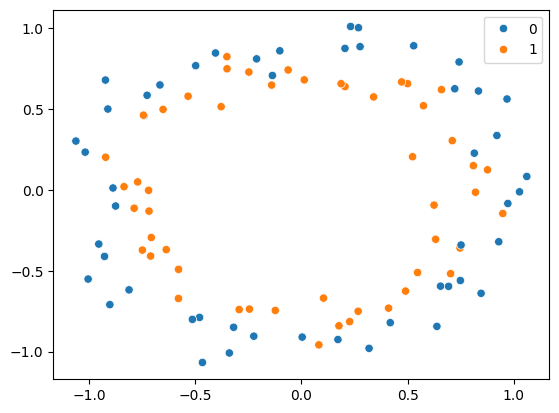

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [14]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test))

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9055 - loss: 0.2973 - val_accuracy: 0.6000 - val_loss: 0.5824
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9016 - loss: 0.3093 - val_accuracy: 0.6500 - val_loss: 0.5836
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9430 - loss: 0.2875 - val_accuracy: 0.6500 - val_loss: 0.5826
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9391 - loss: 0.2852 - val_accuracy: 0.6500 - val_loss: 0.5812
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9273 - loss: 0.2815 - val_accuracy: 0.6500 - val_loss: 0.5806
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9070 - loss: 0.2901 - val_accuracy: 0.6000 - val_loss: 0.5821
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8813 - loss: 0.2857 - val_accuracy: 0.6000 - val_loss: 0.5836
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8953 - loss: 0.2959 - val_accuracy: 0.6000 - v

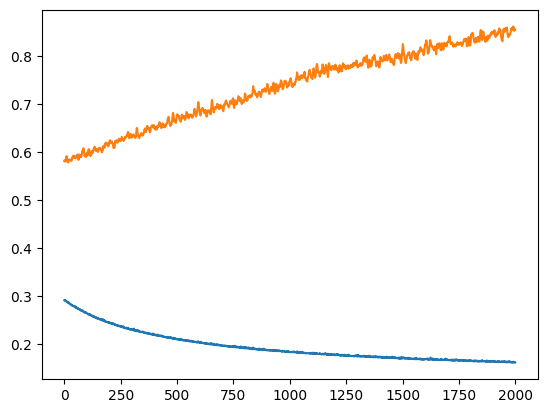

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


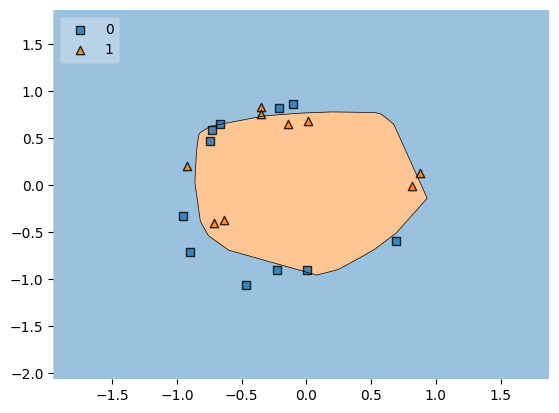

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()



```
Clearly Overfitted as run for very large epochs
```



## Early Stopping
---

In [21]:
model2 = Sequential()

model2.add(Dense(256, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline =None,
    restore_best_weights=False
)

In [24]:
history2 = model2.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.4805 - loss: 0.6921 - val_accuracy: 0.3500 - val_loss: 0.7007
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5031 - loss: 0.6896 - val_accuracy: 0.3500 - val_loss: 0.7028
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5109 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.7055
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5328 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.7076
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5820 - loss: 0.6836 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5344 - loss: 0.6865 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5695 - loss: 0.6811 - val_accuracy: 0.4000 - val_loss: 0.7106
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5055 - loss: 0.6901 - val_accuracy: 0.4000 - 

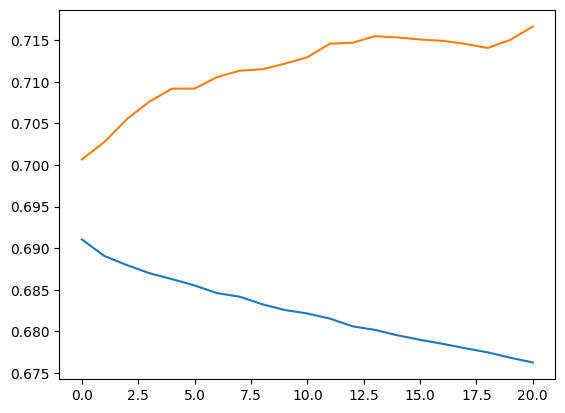

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


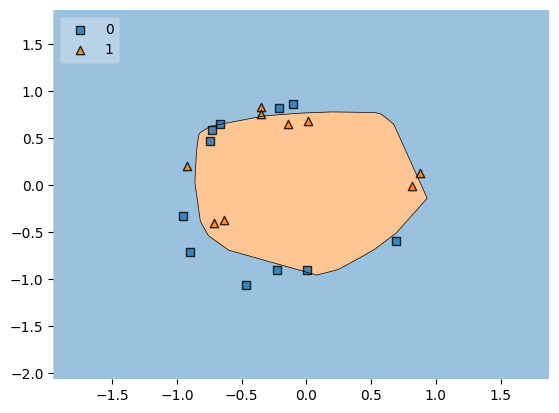

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()